To install, run the following:

`conda create -n py2nc4 python=2.7 numpy scipy matplotlib netcdf4`

> Notes:

> Nab: downloaded through the conda navigator and it worked right away

> Esther: downloaded through the command above in terminal. After shutting down the kernel and restarting, the module imported fine. Experienced problems with using the kernel but installing: `conda install nb_conda_kernels` solved that. Realized that this was an error due to jupyter notebook 

As always, we first run `%pylab inline` to embed figures into the notebook. Additionally, we `import` the `scipy.io.netcdf4` package to let us import data from another file.

In [4]:
%pylab inline
import netCDF4

Populating the interactive namespace from numpy and matplotlib


## Inputting the Data
We read the dataset using the `Dataset` function from netCDF4. It is interesting to note that the variables here include all of the metadata that were previously accessed through looping through each variables' `._attributes`.

Information on how to do that with netcdf is here as well as descriptions of metadata is here: https://github.com/M6ASP/getting-started/blob/master/Reading%20data%20with%20scipy.io.netcdf.ipynb

In [9]:
from netCDF4 import Dataset
ncf = Dataset('example_data/WOA13_annual_SST_nc3_classic.nc', "r", format="NetCDF4")
print(ncf.variables)

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (180,)
filling off
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (360,)
filling off
), ('tos', <class 'netCDF4._netCDF4.Variable'>
float32 tos(lat, lon)
    standard_name: sea_surface_temperature
    long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
    coordinates: time lat lon depth
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: degrees_celsius
    _FillValue: 9.96921e+36
unlimited dimensions: 
current shape = (180, 360)
filling off
)])


Again, we assign variables `lat`, `lon`, and `tos` to their corresponding values from the ordered dict above.

In [11]:
lat = ncf.variables['lat']
lon = ncf.variables['lon']
tos = ncf.variables['tos']

Because sea surface temperature is irrelevant to our land masses, we will mask the hidden values and plot the map again so that the coloring excludes the continents.

In [15]:
# helper function for masking arrays with missing values
def maskArray(handle):
    return numpy.ma.array(handle[:], mask=(handle[:] == handle._FillValue))

In [13]:
masked = maskArray(tos)

We now plot the masked array representing sea surface temperature to get the following plot.

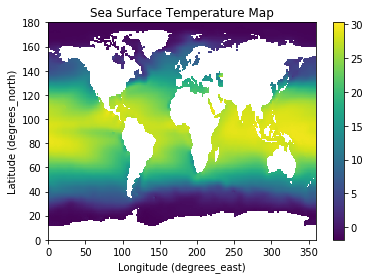

In [14]:
plt.pcolormesh( masked )
plt.colorbar();
plt.title('Sea Surface Temperature Map');
plt.xlabel('Longitude (%s)' %lon.units);
plt.ylabel('Latitude (%s)' %lat.units);